# Softmax Regression
- [文档及公式描述](http://ufldl.stanford.edu/tutorial/supervised/SoftmaxRegression/)
- [scikit-learn 中 OneHotEncoder 解析](https://www.cnblogs.com/zhoukui/p/9159909.html)


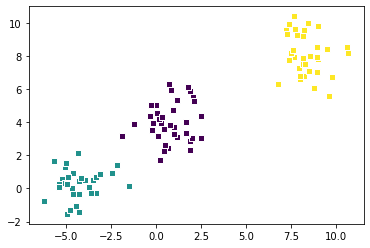

In [1]:
# original method, use numpy to implement
%matplotlib inline
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
from math import exp, log
import copy
np.random.seed(1)

# Hyper-parameters
LR = 0.05
DECAY_RATE = 0.005
THETA = np.random.normal(0, 0.5, 3*3).reshape(3, 3)
EPOCH = 20

X, Y = make_blobs(n_samples=150, n_features=2, centers=3, random_state=3)
# transform y to onehot vector
# scikit-learn 中 OneHotEncoder 解析 https://www.cnblogs.com/zhoukui/p/9159909.html
encoder = OneHotEncoder(categories='auto')
Y = encoder.fit_transform(np.reshape(Y, (150,1))).toarray()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
plt.scatter(X_train[:,0], X_train[:, 1], c=np.argmax(Y_train, axis=1), edgecolors='white', marker='s')
plt.show()

X0_train = np.ones([X_train.shape[0],1],dtype=X_train.dtype)
X0_test = np.ones([X_test.shape[0],1], dtype=X_test.dtype)
X_train_original = copy.deepcopy(X_train)
X_train = np.concatenate((X0_train,X_train), axis=1)
X_test = np.concatenate((X0_test, X_test), axis=1)

THETA [[ 3.05441469  0.77867221  0.56945822]
 [ 3.17164649 -2.97672797  5.24549999]
 [ 8.56296797  0.81404279  7.53288853]]


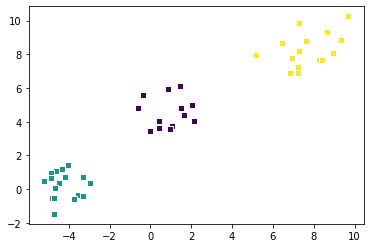

In [2]:
## 2. Make a hypothesis
def hypothesis(x, THETA):
    x = np.reshape(x, (3, 1))
    temp = np.matmul(THETA.T, x)
    temp = np.exp(temp)
    denominator = np.sum(temp)
    hypothesis = temp / denominator # normalize into 1return 
    return hypothesis

## 3. Loss definition
def compute_loss(x, y,THETA):
    loss = 0
    x = np.reshape(x, (3, 1))
    y = np.reshape(y, (3, 1))     # 
    h_x = hypothesis(x, THETA)    # hypothesis (3, 1)
    label = np.argmax(y, axis=0)  # the category of prediction
    loss += (-np.log(h_x[label][0] + 0.0000001))  # loss = - y * log(y')
    return loss

## 4. Parameters updating
def update_parameters(THETA, x, y):
    x = np.reshape(x, (3, 1))
    y = np.reshape(y, (3, 1))
    
    h_x = hypothesis(x, THETA)

    label = np.argmax(y, axis=0)
    #print(y, label)
    # θk := θk - （-yk * (1/y'k) * x)  k --> the class, yk and y'k are real number, x is a vector 
    #THETA[:, label] = THETA[:, label] - LR *(-y[label][0] * (1 / h_x[label][0] * x))
    #HETA[:, label] = THETA[:, label] - LR *(1-h_x[label][0])x
    #print(h_x)
    x = np.reshape(x,[3,1])
    #print(THETA[:, label].shape)
    THETA[:, label] = THETA[:, label]+LR*(1-h_x[label][0])*x
    return THETA

for epoch in range(EPOCH):
    LR = LR * (1 / (1 + DECAY_RATE * epoch))
    i = 0 # retrieve H_x
    for x,y in zip(X_train,Y_train):
        loss = compute_loss(x, y, THETA)
        #print('[{0}/{1}] loss is: {2}'.format(epoch+1, EPOCH, loss))
        THETA = update_parameters(THETA, x, y)

i = 0
print('THETA', THETA)
H_test = np.zeros((Y_test.shape[0], Y_test.shape[1]))
#H_test = np.zeros([Y_test.shape[0], 1], dtype=Y_test.dtype)
for x, y in zip(X_test, Y_test):
    H_test[i] = hypothesis(x, THETA).T
    i+=1
plt.figure(1)
x = np.linspace(-7, 4, 50)
plt.scatter(X_test[:, 1], X_test[:, 2], c=np.argmax(H_test, axis=1), edgecolors='white', marker='s')
plt.show()
